## Population Euler-Lotka

### Problem 1.
a) Two plot as shown in the code \
b) $\sum\limits_{a=0}^n {\lambda ^{-(a+1)}I_a f_a -1}$ where $I_a$ is [1,0.5,0.45,0.4275] $f_a$ is [0,1,5,0.5] arrays and $\lambda$ is 1.462284 from polyfit results & 1.462375 from log plot graph intersection with the y=0. I think my two answer are pretty close and they are within expection. 

In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import math

In [2]:
def eulot_func_x(lam,Ia_arr,fa_arr):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        temp_arr= lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(temp_arr) -1 

In [3]:
def eulot_func(lam):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        #temp_arr=lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(lam**(-(age_arr+1))*Ia_arr*fa_arr) - 1 

In [4]:
Ia_arr=np.array([1,.5,0.45,0.4275])
fa_arr=np.array([0,1,5,.5])

In [5]:
left_bracket=1
right_bracket=3

opt.brentq(eulot_func,left_bracket,right_bracket)

1.462375909250963

In [6]:
lambda_min=.5
lambda_max=5

#Range of lambda values we'll plot over
lambda_arr=np.linspace(lambda_min,lambda_max,100) 

G_arr=np.zeros(lambda_arr.size)

iter_arr=np.arange(lambda_arr.size)

for j in iter_arr:
    G_arr[j]=eulot_func_x(lambda_arr[j],Ia_arr,fa_arr) 

In [7]:
n_zero=np.array([100,100,100,100])

In [8]:
A_mat = np.array([[0,1,5,0.5],[0.5 ,0 ,0,0],[0 , 0.9,0, 0],[0 , 0, 0.95, 0]])

In [9]:
Tmax=50

n_vs_t=np.zeros([4,Tmax])

n_vs_t[:,0]=n_zero 


#Print out our quanties so far, check that they make sense
print(n_vs_t[:,0])
print(A_mat)
np.dot(A_mat,n_vs_t[:,0])

[100. 100. 100. 100.]
[[0.   1.   5.   0.5 ]
 [0.5  0.   0.   0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.95 0.  ]]


array([650.,  50.,  90.,  95.])

In [11]:
iter_arr=np.arange(Tmax-1)

for t in iter_arr:
    n_vs_t[:,t+1]=np.dot(A_mat,n_vs_t[:,t])

In [12]:
generation_arr=np.arange(Tmax)

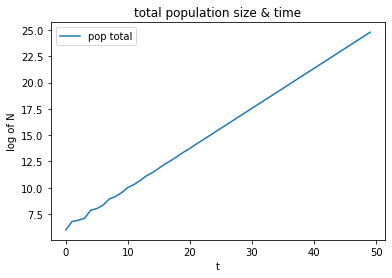

In [14]:
plt.plot(generation_arr,np.log(np.sum(n_vs_t, axis=0)),label="pop total")
plt.xlabel('t')
plt.ylabel('log of N')
plt.legend()
plt.title("total population size & time")
plt.show()

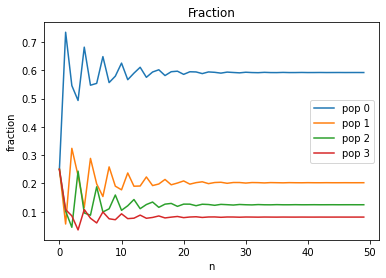

In [15]:
generation_arr=np.arange(Tmax)
plt.plot(generation_arr,n_vs_t[0,:]/np.sum(n_vs_t, axis=0),label="pop 0")
plt.plot(generation_arr,n_vs_t[1,:]/np.sum(n_vs_t, axis=0),label="pop 1")
plt.plot(generation_arr,n_vs_t[2,:]/np.sum(n_vs_t, axis=0),label="pop 2")
plt.plot(generation_arr,n_vs_t[3,:]/np.sum(n_vs_t, axis=0),label="pop 3")
plt.xlabel('n')
plt.ylabel('fraction')
plt.legend()
plt.title("Fraction")
plt.show()

In [16]:
z = np.polyfit(generation_arr,np.log(np.sum(n_vs_t, axis=0)), 1)
z[0]

0.38019637750967417

In [17]:
math.exp(0.38)

1.4622845894342245

### Problem 2. 

a) Because in this problem, when the age is larger than 3, the Pa would the same for all of the other age, p0p1p2p3p4.... At the same time, the owl begin breeding at age a = 3 so there is no f0, f1, f2, but start directly from f3, so based on the Euler-lotka equation, as long as I3 is the same,the individual p values does not matter. \
b) shown as below.\
c) the long-term growth rate of the population is 0.94314

In [18]:
A_mat2 = np.zeros( (51, 51) )
A_mat2[0][0:4] = [0] * 4
A_mat2[0][4:51] = [0.24] * 47

In [19]:
A_mat2[1][0] = 1
A_mat2[2][1] = 0.4
A_mat2[3][2] = 0.5
A_mat2[4][3] = 0.361

In [20]:
for i in range(4,50):
    A_mat2[i+1][i] = 0.942

b) Projection matrix shown as below

In [21]:
A_mat2

array([[0.   , 0.   , 0.   , ..., 0.24 , 0.24 , 0.24 ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.4  , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.942, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.942, 0.   ]])

In [22]:
fa_arr_2=A_mat2[0]

In [23]:
fa_arr_2

array([0.  , 0.  , 0.  , 0.  , 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24])

In [24]:
Ia_arr_2 = np.zeros(51)
Ia_arr_2[0] = 1
Ia_arr_2[1] = 0.4
Ia_arr_2[2] = 0.2
Ia_arr_2[3] = 0.0722

In [25]:
for i in range (4,51):
    Ia_arr_2[i] = Ia_arr_2[i-1] * 0.942

In [26]:
left_bracket=0.1
right_bracket=3
arg = (Ia_arr_2,fa_arr_2)
opt.brentq(eulot_func_x,left_bracket,right_bracket,arg)

0.9431395158550951